# Vérification poutre bois en flexion simple et au déversement

## 1. Données générales

### 1.1. Références normatives

*- NF EN 1995 + AN : Conception et calcul des structures en bois*

In [2]:
%%html
<script>
    // AUTORUN ALL CELLS ON NOTEBOOK-LOAD!
    require(
        ['base/js/namespace', 'jquery'], 
        function(jupyter, $) {
            $(jupyter.events).on("kernel_ready.Kernel", function () {
                console.log("Auto-running all cells-below...");
                jupyter.actions.call('jupyter-notebook:run-all-cells-below');
                jupyter.actions.call('jupyter-notebook:save-notebook');
            });
        }
    );
</script>

### 1.2. Matériau

In [3]:
from math import *
import ipywidgets as widgets
from tkinter import *
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Javascript, display
from ipywidgets import widgets
import pandas as pd
from math import *
import ipywidgets as widgets
from tkinter import *

In [4]:
bois=widgets.Dropdown(
    options=['Résineux','Feuillus','Lamellé collé'],
    value='Résineux',
    description='Bois :',
    disabled=False,
)
bois


Dropdown(description='Bois :', options=('Résineux', 'Feuillus', 'Lamellé collé'), value='Résineux')

In [5]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+2)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

In [6]:
if bois.value=='Résineux':
    classe=widgets.Dropdown(
        options=['C14','C16','C18','C20','C22','C24','C27','C30','C35','C40'],
        value='C20',
        description='Classe :',
        disabled=False,
)
elif bois.value=='Feuillus':
    classe=widgets.Dropdown(
        options=['D30','D35','D40','D50','D60','D70'],
        value='D30',
        description='Classe :',
        disabled=False,
)
else:
    classe=widgets.Dropdown(
        options=['GL24h','GL28h','GL32h','GL36h','GL24c','GL28c','GL32c','GL36c'],
        value='GL24h',
        description='Classe :',
        disabled=False,
)

display(classe)

Dropdown(description='Classe :', index=3, options=('C14', 'C16', 'C18', 'C20', 'C22', 'C24', 'C27', 'C30', 'C3…

In [7]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+5)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

In [8]:
import pandas as pd

caracbois=pd.read_excel("caracB.xlsx")

In [9]:
fmk=caracbois.loc[0,classe.value]
ft0k=caracbois.loc[1,classe.value]
ft90k=caracbois.loc[2,classe.value]
fc0k=caracbois.loc[3,classe.value]
fc90k=caracbois.loc[4,classe.value]
fvk=caracbois.loc[5,classe.value]
e0m=caracbois.loc[6,classe.value]
e05=caracbois.loc[7,classe.value]
pm=caracbois.loc[8,classe.value]

|Caractéristiques|Symbole|{{classe.value}}|Unité|
|-|-|-|-|
|Flexion|$$f_{m,k}$$|{{fmk}}|$$N/mm^{2}$$|
|Traction axiale|$$f_{t,0,k}$$|{{ft0k}}|$$N/mm^{2}$$|
|Traction transversalle|$$f_{m,k}$$|{{ft90k}}|$$N/mm^{2}$$|
|Compression axiale|$$f_{m,k}$$|{{fc0k}}|$$N/mm^{2}$$|
|Compression transversale|$$f_{m,k}$$|{{fc90k}}|$$N/mm^{2}$$|
|Cisaillement|$$f_{v,k}$$|{{fvk}}|$$N/mm^{2}$$|
|Module moyen d'élasticité axial|$$E_{0,moy}$$|{{e0m}}|$$N/mm^{2}$$|
|Module caractéristique d'élasticité axial|$$E_{0,0,5}$$|{{e05}}|$$N/mm^{2}$$|
|Masse volumique moyenne|$$\rho_{moy}$$|{{pm}}|$$kg/m^{2}$$|

### 1.3. Valeurs de calcul des résistance du bois

#### Classe de service

In [10]:
service=widgets.ToggleButtons(
    options=['Classe de service 1', 'Classe de service 2', 'Classe de service 3'],
    description='',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
   
)
service

ToggleButtons(options=('Classe de service 1', 'Classe de service 2', 'Classe de service 3'), value='Classe de …

#### Classe de durée de charge

In [11]:
file = open("duree_charge.png", "rb")
image = file.read()
widgets.Image(
    value=image,
    format='png',
    width=500,
    height=500,
)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x04\x00\x00\x00\xca\x04\x03\x00\x00\x00(QEH\x00\…

In [12]:
duree=widgets.ToggleButtons(
    options=['Permanente', 'Long terme', 'Moyen terme','Court terme','Instantanné'],
    description='',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
   
)
duree

ToggleButtons(options=('Permanente', 'Long terme', 'Moyen terme', 'Court terme', 'Instantanné'), value='Perman…

In [13]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+4)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

#### Coefficients minorateurs

In [14]:
if service.value=='Classe de service 3':
    if duree.value=='Permanente':
        kmod=0.5
    elif duree.value=='Long terme':
        kmod=0.55
    elif duree.value=='Moyen terme':
        kmod=0.65
    elif duree.value=='Court terme':
        kmod=0.7
    else:
        kmod=0.9
else:
    if duree.value=='Permanente':
        kmod=0.6
    elif duree.value=='Long terme':
        kmod=0.7
    elif duree.value=='Moyen terme':
        kmod=0.8
    elif duree.value=='Court terme':
        kmod=0.9
    else:
        kmod=1.1
        
if bois.value=='Lamellé collé':
    gm=1.25
else:
    gm=1.3

|Coefficeint|Valeur|
|-----------|--|
|$$k_{mod}=$$|{{kmod}}|
|$$\gamma_{m}=$$|{{gm}}|

### 1.3. Section

In [15]:
b=widgets.FloatSlider(
    value=100,
    min=0,
    max=500,
    step=10,
    description=('Base [mm]'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
h=widgets.FloatSlider(
    value=200,
    min=0,
    max=1000,
    step=20,
    description=('Hauteur [mm]'),
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='.1f',
)
display(b)
display(h)

FloatSlider(value=100.0, continuous_update=False, description='Base [mm]', max=500.0, readout_format='.1f', st…

FloatSlider(value=200.0, continuous_update=False, description='Hauteur [mm]', max=1000.0, readout_format='.1f'…

In [16]:
def run_all(ev):
    display(Javascript('IPython.notebook.execute_cell_range(IPython.notebook.get_selected_index()+1, IPython.notebook.get_selected_index()+9)'))

button = widgets.Button(description="Valider")

button.on_click(run_all)
display(button)

Button(description='Valider', style=ButtonStyle())

### 1.4 Vérification de la poutre à l'ELU

$$\sigma_{m,d}\leq f_{m,k}.\frac{k_{mod}}{\gamma_{m}}.k_{h}.k_{crit}$$

In [17]:
if bois.value=='Lamellé collé':
    if h.value>600:
        kh=1
    else:
        kh=min(1.1,pow((600/h.value),0.1))
else:
    if h.value>150:
        kh=1
    else:
        kh=min(1.3,pow((150/h.value),0.2))
        
kh=round(kh,3)

sigcrit=(0.78*e05*b.value*b.value)/(h.value*0.9)

lrel=sqrt(fmk/sigcrit)

if lrel<=0.75:
    kcrit=1
elif lrel<=1.4:
    kcrit=1.56-0.75*lrel
else:
    kcrit=1/pow(lrel,2)

kcrit=round(kcrit,2)

sigcrit=round(sigcrit,0)

lrel=round(lrel,2)


Avec : 

||Symbole|Valeur|
|-|-|-|
|Coeff. de hauteur|$$k_{h}$$|{{kh}}|
|Contrainte critique déversement [MPa]|$$\sigma_{m,crit}$$|{{sigcrit}}|
|Elancement relatif en flexion|$$\lambda_{rel,m}$$|{{lrel}}|
|Coeff. d'instabilité (déversement)|$$k_{crit}$$|{{kcrit}}|


In [18]:
fmd=fmk*(kmod/gm)*kh*kcrit
fmd=round(fmd,2)

ig=(b.value*pow(h.value,3))/12

mmax=fmd*(ig/(h.value/12))

mmax=round(mmax*pow(10,-5),0)

print(b.value)
print(h.value)

100.0
200.0


#### Moment max admissible 

||Symbole|Valeur|
|-----------------------------|-----------|-------|
|Résistance à la flexion [MPa]|$$f_{m,d}$$|{{fmd}}|
|Moment max adimissible [kN.m]|$$M_{m,d}$$|{{mmax}}|


#### Abaque de dimensionnement à l'ELU pour poutre {{classe.value}} {{b.value}}x{{h.value}}mm ht.
 

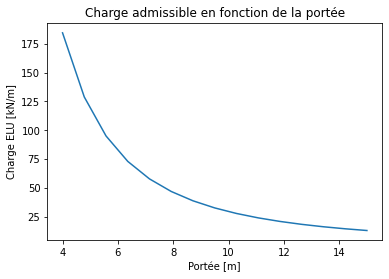

In [19]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(4, 15, 15)
y = (8*mmax)/(x*x)
plt.plot(x, y)
plt.title("Charge admissible en fonction de la portée")
plt.xlabel("Portée [m]")
plt.ylabel("Charge ELU [kN/m]")

plt.show() # affiche la figure a l'ecran

### 1.5 Vérification de la poutre à l'ELS

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


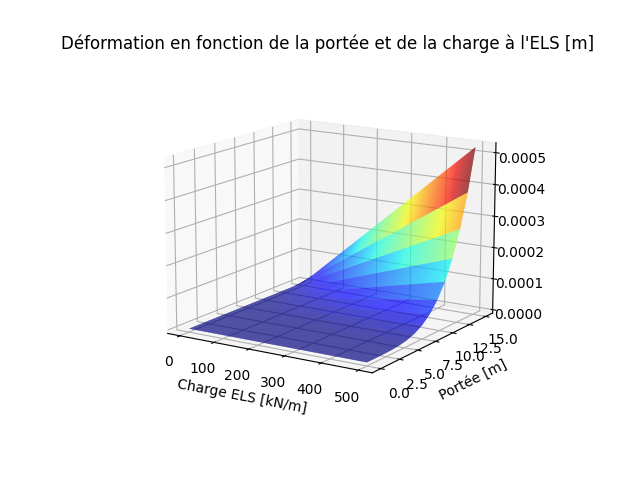

Text(0.5, 0, 'Portée [m]')

In [21]:
def f(x, y):
    return (5*x*y**4)/(384*e0m*ig)
x = np.linspace(0, 500, 500)
y = np.linspace(0, 15, 15)
X, Y = np.meshgrid(x, y)
Z = f(X,Y)

%matplotlib notebook

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
cmap='jet', edgecolor='none')

plt.title("Déformation en fonction de la portée et de la charge à l'ELS [m]")
plt.xlabel("Charge ELS [kN/m]")
plt.ylabel("Portée [m]")

In [22]:
print(ig)

66666666.666666664
